#June 2   First version for web traffic
* Mainly using prophet to predicate 
* competition site :https://www.kaggle.com/c/web-traffic-time-series-forecasting/discussion/39876
https://www.kaggle.com/code/simonstochholm/web-traffic-forecasting
https://www.kaggle.com/code/rpbenatti/dh-desafio-4-benatti

# 1 Overviewing

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from fbprophet import Prophet
import gc

In [2]:
train_1=pd.read_csv("c:/csv/web_traffic_predicatie/train_1.csv")
key_1 = pd.read_csv("c:/csv/web_traffic_predicatie/key_1.csv")
sub_1= pd.read_csv("c:/csv/web_traffic_predicatie/sample_submission_1.csv")

In [54]:
sub_1.head()

,Id,Visits
0,bf4edcf969af,0
1,929ed2bf52b9,0
2,ff29d0f51d5c,0
3,e98873359be6,0
4,fa012434263a,0


In [8]:
key_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703780 entries, 0 to 8703779
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Page    object
 1   Id      object
dtypes: object(2)
memory usage: 132.8+ MB


In [7]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


# 2 Understanding data 

## 2.1 about train_1

In [40]:
145063*60

8703780

In [6]:
print(train_1.shape,key_1.shape)

(145063, 551) (8703780, 2)


In [8]:
display(train_1)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
train_1.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

** above indicates visit-records is 550 days which from 2015-07-01 to 2016-12-31

In [24]:
start="2015-07-01"
end="2016-12-31"
print((pd.Period(end, freq="D") - pd.Period(start, freq="D")).n)  

549


* it prove the squeence columns is **Continuous**

In [33]:
# count the type of visit_site
sites = ["wikipedia.org", "commons.wikimedia.org", "www.mediawiki.org"]
def filter_by_site(page):
    for site in sites:
        if site in page:
            return site
# Creating a new column having the site part of the article page
train_1['Site'] = train_1.Page.apply(filter_by_site)

In [35]:
train_1['Site']

0         wikipedia.org
1         wikipedia.org
2         wikipedia.org
3         wikipedia.org
4         wikipedia.org
              ...      
145058    wikipedia.org
145059    wikipedia.org
145060    wikipedia.org
145061    wikipedia.org
145062    wikipedia.org
Name: Site, Length: 145063, dtype: object

In [36]:
train_1['Site'].value_counts(dropna=False)

wikipedia.org            127208
commons.wikimedia.org     10555
www.mediawiki.org          7300
Name: Site, dtype: int64

In [24]:
print(key_1.shape)
key_1.head()

(8703780, 2)


,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


* Total 550 days, whic prove that sequence of columns is continuous.

In [39]:
temp=key_1["Page"].str.split("_",expand=True)[4].value_counts().index.to_list()

KeyboardInterrupt: 

In [45]:
key_1["Page"][8703779]

'龙生九子_zh.wikipedia.org_mobile-web_all-agents_2017-03-01'

In [11]:
temp=key_1["Page"].str.split("_",expand=True)

In [12]:
temp

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,!vote,en.wikipedia.org,all-access,all-agents,2017-01-01,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,!vote,en.wikipedia.org,all-access,all-agents,2017-01-02,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,!vote,en.wikipedia.org,all-access,all-agents,2017-01-03,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,!vote,en.wikipedia.org,all-access,all-agents,2017-01-04,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,!vote,en.wikipedia.org,all-access,all-agents,2017-01-05,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703775,龙生九子,zh.wikipedia.org,mobile-web,all-agents,2017-02-25,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8703776,龙生九子,zh.wikipedia.org,mobile-web,all-agents,2017-02-26,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8703777,龙生九子,zh.wikipedia.org,mobile-web,all-agents,2017-02-27,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8703778,龙生九子,zh.wikipedia.org,mobile-web,all-agents,2017-02-28,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [41]:
print(train_1.shape,key_1.shape)

(145063, 552) (8703780, 2)


** Conclusion: **
* 1 In train, date range is 2015-7-1 to 2016-12-31 and total 550 days.
* 2 In train, number of web_site is 145063.
* 3 In key,predication days is 2017-1-1 to 2017-3-1 and total 60 days.
* 4 By combination number of web_site and the predication 60 days, it's result is 8703780.(60*870380)


In [49]:
60*145063

8703780

In [ ]:
filter用法

In [58]:
del temp1

In [59]:
import gc
gc.collect()

575

## 2 Data preparation for prophet

* Beacasue of too big of train ,so make a random sample of train.
* Formating the DF data form by Prophet requires.

In [3]:
# Creating a sample dataset from the Train dataset for analysis
train_1_sample = train_1.sample(20, random_state=50)

In [4]:
train_1_sample.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
132685,高岡早紀_ja.wikipedia.org_all-access_spider,9.0,7.0,8.0,4.0,7.0,7.0,6.0,2.0,10.0,...,36.0,57.0,152.0,76.0,50.0,54.0,29.0,37.0,38.0,31.0
69878,Ed_y_Lorraine_Warren_es.wikipedia.org_desktop_...,252.0,201.0,202.0,161.0,344.0,321.0,261.0,274.0,197.0,...,279.0,234.0,158.0,178.0,356.0,402.0,541.0,361.0,257.0,226.0
71984,Ciencia_política_es.wikipedia.org_desktop_all-...,518.0,478.0,377.0,275.0,296.0,466.0,505.0,421.0,431.0,...,202.0,135.0,94.0,76.0,291.0,149.0,225.0,134.0,142.0,108.0
130476,Suicide_Squad_(film)_fr.wikipedia.org_all-acce...,18.0,7.0,8.0,5.0,6.0,5.0,3.0,1.0,4.0,...,14.0,12.0,14.0,11.0,26.0,10.0,28.0,23.0,18.0,24.0
3944,超少年密码_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,17.0,11.0,13.0,5.0,6.0,10.0,7.0,9.0,6.0


In [4]:
# Transposing the sample dataset to have Date Time at the index
train_1_sampleT = train_1_sample.drop('Page', axis=1).T
train_1_sampleT.columns = train_1_sample.Page.values
train_1_sampleT

,高岡早紀_ja.wikipedia.org_all-access_spider,Ed_y_Lorraine_Warren_es.wikipedia.org_desktop_all-agents,Ciencia_política_es.wikipedia.org_desktop_all-agents,Suicide_Squad_(film)_fr.wikipedia.org_all-access_spider,超少年密码_zh.wikipedia.org_all-access_spider,Immanuel_Kant_de.wikipedia.org_all-access_all-agents,Manual:$wgSMTP_www.mediawiki.org_desktop_all-agents,"Мстители_(фильм,_2012)_ru.wikipedia.org_desktop_all-agents",Sistema_muscular_es.wikipedia.org_mobile-web_all-agents,Antalya_de.wikipedia.org_all-access_all-agents,峰岸徹_ja.wikipedia.org_all-access_spider,時をかける少女_(アニメ映画)_ja.wikipedia.org_all-access_spider,天命_(無綫電視劇)_zh.wikipedia.org_all-access_all-agents,吹石一恵_ja.wikipedia.org_mobile-web_all-agents,Dilma_Rousseff_fr.wikipedia.org_desktop_all-agents,Rachel_Roy_en.wikipedia.org_all-access_all-agents,Capucine_Anav_fr.wikipedia.org_all-access_spider,Binali_Yıldırım_de.wikipedia.org_all-access_spider,Petra_Mede_de.wikipedia.org_all-access_all-agents,27._September_de.wikipedia.org_desktop_all-agents
2015-07-01,9.0,252.0,518.0,18.0,NaN,1102.0,73.0,895.0,880.0,492.0,18.0,11.0,NaN,749.0,116.0,336.0,NaN,3.0,11.0,25.0
2015-07-02,7.0,201.0,478.0,7.0,NaN,1053.0,55.0,1200.0,856.0,576.0,3.0,3.0,NaN,628.0,76.0,388.0,NaN,1.0,7.0,30.0
2015-07-03,8.0,202.0,377.0,8.0,NaN,869.0,38.0,862.0,636.0,499.0,6.0,11.0,NaN,820.0,71.0,366.0,NaN,1.0,7.0,30.0
2015-07-04,4.0,161.0,275.0,5.0,NaN,742.0,24.0,888.0,399.0,457.0,4.0,6.0,NaN,780.0,80.0,325.0,NaN,3.0,13.0,33.0
2015-07-05,7.0,344.0,296.0,6.0,NaN,971.0,28.0,946.0,620.0,564.0,3.0,3.0,NaN,1149.0,95.0,332.0,NaN,5.0,8.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,54.0,402.0,149.0,10.0,6.0,982.0,28.0,779.0,178.0,187.0,22.0,12.0,758.0,1690.0,114.0,934.0,18.0,3.0,9.0,28.0
2016-12-28,29.0,541.0,225.0,28.0,10.0,1061.0,50.0,913.0,172.0,234.0,19.0,17.0,741.0,1499.0,110.0,936.0,8.0,1.0,13.0,40.0
2016-12-29,37.0,361.0,134.0,23.0,7.0,1092.0,40.0,828.0,175.0,229.0,1323.0,17.0,776.0,1151.0,105.0,850.0,11.0,3.0,15.0,32.0
2016-12-30,38.0,257.0,142.0,18.0,9.0,984.0,69.0,779.0,168.0,185.0,86.0,26.0,877.0,1390.0,109.0,1049.0,9.0,4.0,15.0,26.0


In [5]:
train_1_sampleT.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [6]:
# Picked up one Time Series for the prophet modeling
train_1_sampleT.columns[1]

'Ed_y_Lorraine_Warren_es.wikipedia.org_desktop_all-agents'

In [7]:
ds = pd.Series(train_1_sampleT.index)
y = pd.Series(train_1_sampleT.iloc[:,1].values)
frame = { 'ds': ds, 'y': y }
df = pd.DataFrame(frame)
print(df.shape)
df.head()

(550, 2)


,ds,y
0,2015-07-01,252.0
1,2015-07-02,201.0
2,2015-07-03,202.0
3,2015-07-04,161.0
4,2015-07-05,344.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      550 non-null    object 
 1   y       550 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


* So it meet Prophet'requirement of data and column.

# 3 Prophet Model and paras Tuneing

## 3.1 capture the trend

<AxesSubplot:>

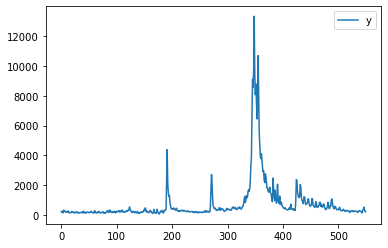

In [8]:
df.plot()

* Instantiate and fit the Prophet model with **no hyperparameters at all**

In [9]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# Make dataframe for the future predictions to the next 60 days
# By default it will also include the dates from the history
# In summary it will have 550 + 60 days (610)
future = m.make_future_dataframe(periods=60)
future.head()

,ds
0,2015-07-01
1,2015-07-02
2,2015-07-03
3,2015-07-04
4,2015-07-05


In [11]:
# Predicting the values from the future dataframe
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
605,2017-02-25,-912.477814,-2382.590102,748.087090
606,2017-02-26,-771.080469,-2211.017181,874.681501
607,2017-02-27,-658.172560,-2255.255969,903.731439
608,2017-02-28,-864.000762,-2358.644068,658.243496
609,2017-03-01,-964.649697,-2571.446144,681.378760


In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,51.622755,-1570.803294,1581.283142,51.622755,51.622755,-92.801367,-92.801367,-92.801367,-92.801367,-92.801367,-92.801367,0.0,0.0,0.0,-41.178612
1,2015-07-02,53.466600,-1472.369682,1624.987441,53.466600,53.466600,-31.521890,-31.521890,-31.521890,-31.521890,-31.521890,-31.521890,0.0,0.0,0.0,21.944710
2,2015-07-03,55.310445,-1501.037431,1608.448581,55.310445,55.310445,-35.217126,-35.217126,-35.217126,-35.217126,-35.217126,-35.217126,0.0,0.0,0.0,20.093319
3,2015-07-04,57.154290,-1547.836044,1587.150381,57.154290,57.154290,-89.478017,-89.478017,-89.478017,-89.478017,-89.478017,-89.478017,0.0,0.0,0.0,-32.323727
4,2015-07-05,58.998135,-1290.617730,1612.217100,58.998135,58.998135,64.131462,64.131462,64.131462,64.131462,64.131462,64.131462,0.0,0.0,0.0,123.129597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2017-02-25,-822.999797,-2584.460216,610.082671,-944.183459,-700.110127,-89.478017,-89.478017,-89.478017,-89.478017,-89.478017,-89.478017,0.0,0.0,0.0,-912.477814
606,2017-02-26,-835.211931,-2214.016290,840.698031,-963.123346,-709.158498,64.131462,64.131462,64.131462,64.131462,64.131462,64.131462,0.0,0.0,0.0,-771.080469
607,2017-02-27,-847.424064,-2150.071119,872.272110,-978.521667,-716.694423,189.251504,189.251504,189.251504,189.251504,189.251504,189.251504,0.0,0.0,0.0,-658.172560
608,2017-02-28,-859.636197,-2412.246160,705.058919,-996.365423,-723.863504,-4.364565,-4.364565,-4.364565,-4.364565,-4.364565,-4.364565,0.0,0.0,0.0,-864.000762


In [12]:
# The forecast object here is a new dataframe that includes a column yhat with the forecast, 
# as well as columns for components and uncertainty intervals
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,51.622755,-1675.477521,1567.857100,51.622755,51.622755,-92.801367,-92.801367,-92.801367,-92.801367,-92.801367,-92.801367,0.0,0.0,0.0,-41.178612
1,2015-07-02,53.466600,-1605.403331,1585.797463,53.466600,53.466600,-31.521890,-31.521890,-31.521890,-31.521890,-31.521890,-31.521890,0.0,0.0,0.0,21.944710
2,2015-07-03,55.310445,-1636.331776,1627.716128,55.310445,55.310445,-35.217126,-35.217126,-35.217126,-35.217126,-35.217126,-35.217126,0.0,0.0,0.0,20.093319
3,2015-07-04,57.154290,-1641.829880,1520.876881,57.154290,57.154290,-89.478017,-89.478017,-89.478017,-89.478017,-89.478017,-89.478017,0.0,0.0,0.0,-32.323727
4,2015-07-05,58.998135,-1467.981792,1613.928619,58.998135,58.998135,64.131462,64.131462,64.131462,64.131462,64.131462,64.131462,0.0,0.0,0.0,123.129597


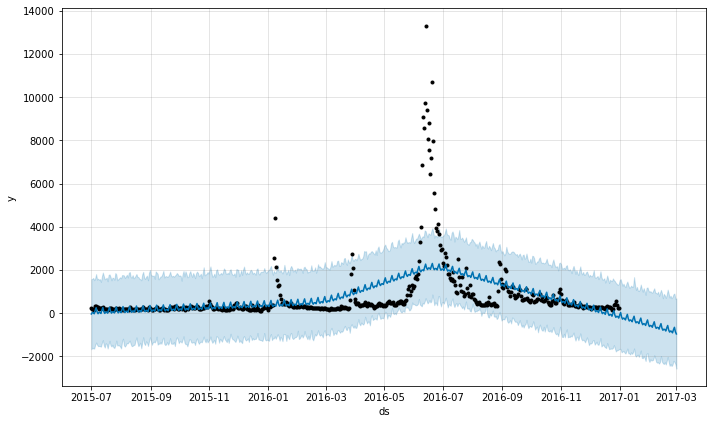

In [13]:
# Plotting the forecast by calling the Prophet.plot method and passing in the forecast dataframe
fig1 = m.plot(forecast)

* Plotting the forecast components by calling the Prophet.plot_components method
* By default it includes the **trend and seasonality**  of the time series

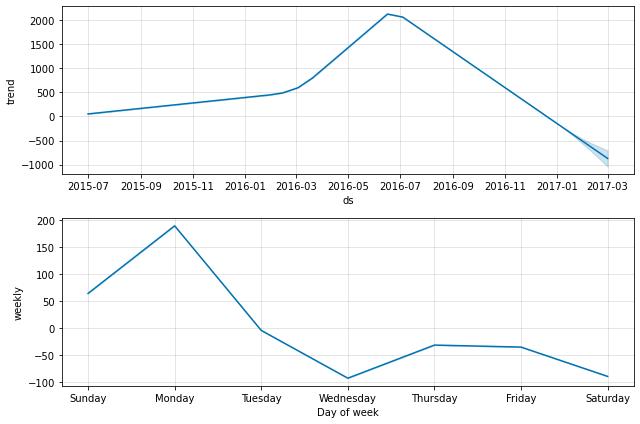

In [14]:
fig2 = m.plot_components(forecast)

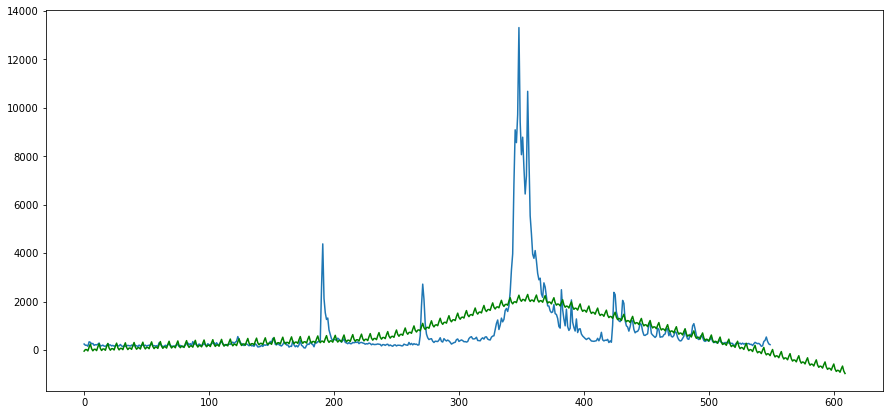

In [15]:
# Plotting both the Actual values and Predict values at the same graph for comparison
plt.figure(figsize=(15, 7))
plt.plot(df.y)                  # Actual values in default blue color
plt.plot(forecast.yhat, "g");   # Predicted values in green color

* The figure show that Prophet **capture the trend**

## 3.2 Saturating Forecasts

*As per the above results, the time Series prediction shows a trend to the bottom, reaching negative values, 
which is not accepted in this case. There should be no negative visits to a Wikipedia Article

For this reason, I tried to use the prophet logistic growth model handling a Saturating Minimum, setting the floor value to zero. However, in order to use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified.*

In [16]:
# Setting the floor value to 0 and the capacity to a lower value in the future
df['cap'] =200     # notice the average of trend figure.
df['floor'] = 0.0
future['cap'] =200
future['floor'] = 0.0

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


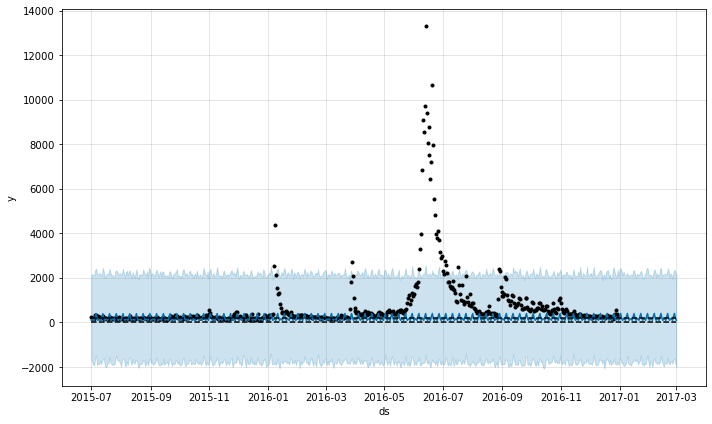

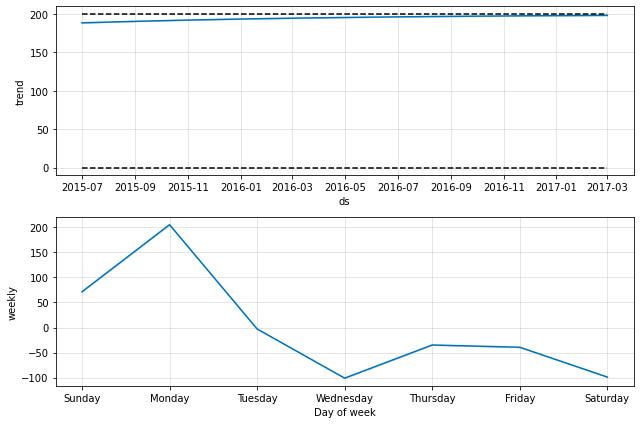

In [17]:
# Instantiating prophet 'logistic' growth mode, then fitting and predicting future values
m = Prophet(growth='logistic')
forecast = m.fit(df).predict(future)

# Plotting both the forecast predictions and components
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

* In whole,fit much better beacuse seassonality capture the most frequence.Seasonalities are estimated using a partial Fourier sum.
However, we could not capture the high picks.

## 3.3 Prophet - Seasonality

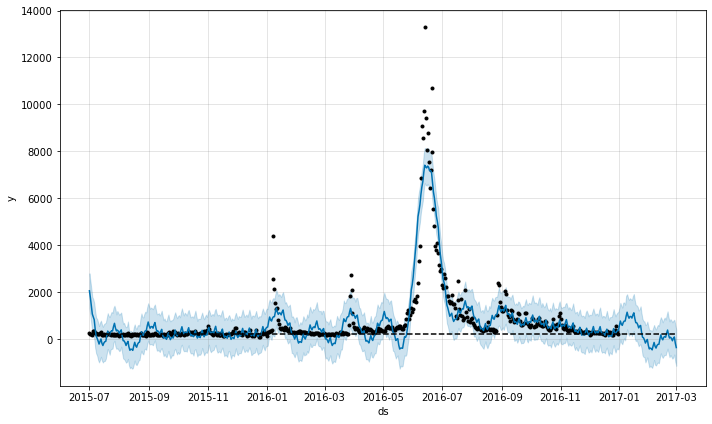

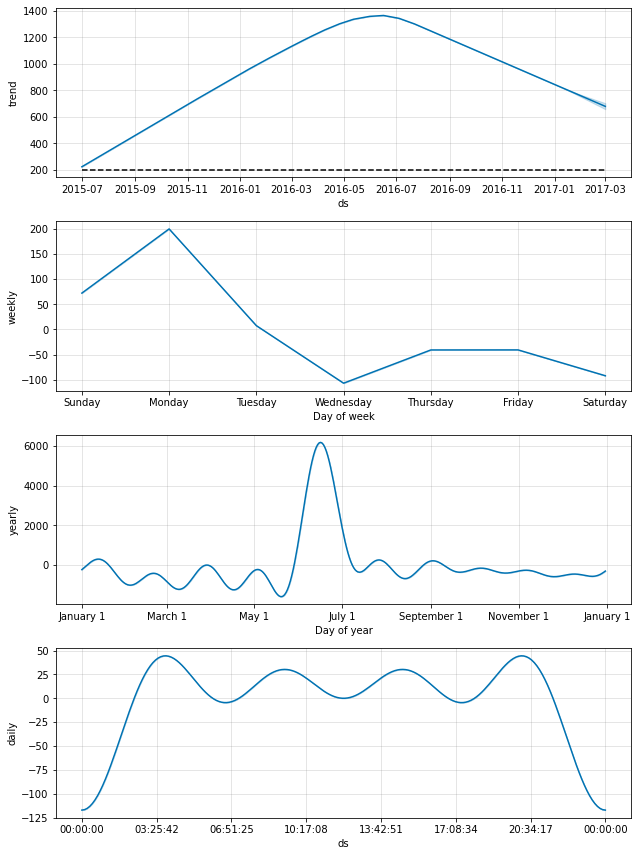

In [18]:
# Instantiate prophet with default seasonality parameters, fitting and predicting the future
# Plotting both the forecast and its components
# I will keep the default growth='linear' by now instead of 'logistic'
m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
forecast = m.fit(df).predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

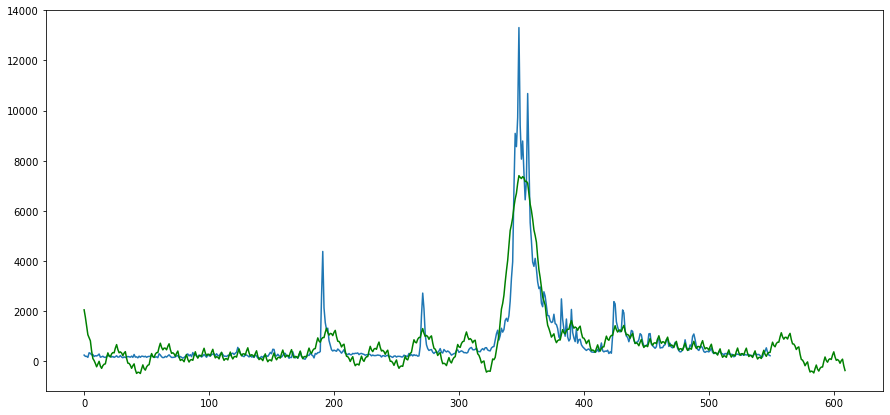

In [19]:
#Plotting both the Actual values and Predict values at the same graph for comparison
plt.figure(figsize=(15, 7))
plt.plot(df.y)                  # Actual values in default blue color
plt.plot(forecast.yhat, "g");   # Predicted values in green color

## 3.4 Prophet - Changepoints

* Exploring the use of Prophet changepoints to automatically detect 
* these abrupt changes in the time series trajectories and see if it will allow the trend to adapt appropriately.

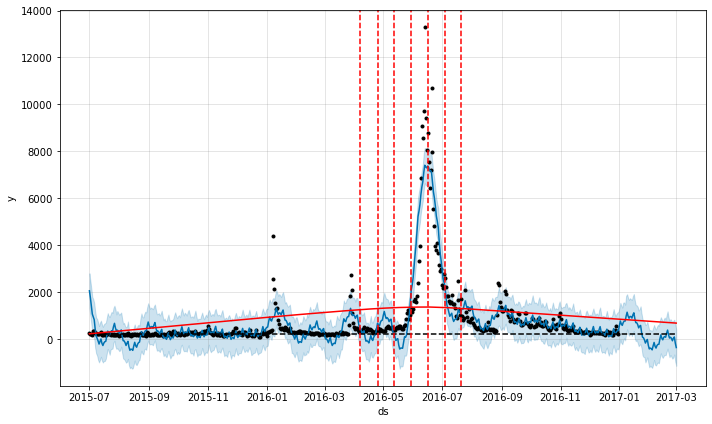

In [20]:
# Checking the locations of the significant changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

* By default changepoints are only inferred for the first 80% of the time series in order to have plenty of runway
for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series.

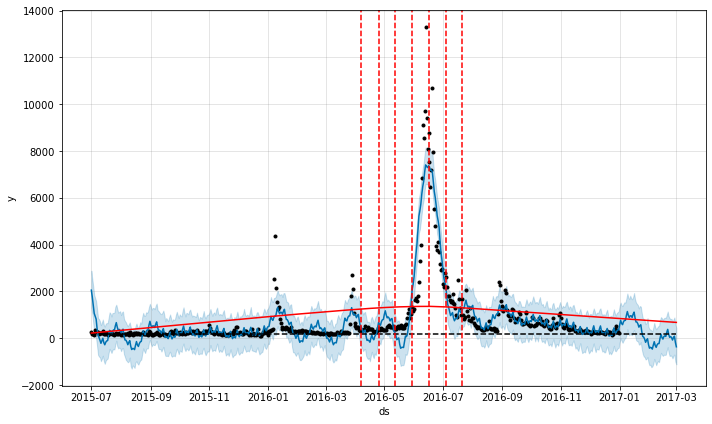

In [21]:
# Increasing the 'changepoint_range' parameter from default 80% to 90%
m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True,
            changepoint_range=0.8)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [22]:
 m.params['delta']

array([[-8.94336632e-08, -3.03779263e-07, -3.48167154e-07,
        -3.02141169e-06, -1.50852121e-06, -2.67705770e-06,
        -3.05898100e-03, -3.72412083e-05, -1.09892915e-05,
        -1.15954901e-03, -6.11248621e-03, -5.01387688e-03,
        -2.58742382e-03, -3.30703018e-03, -6.90122428e-03,
        -1.78938473e-02, -2.41580567e-02, -3.80314537e-02,
        -3.23630611e-02, -6.68138005e-02, -4.58809452e-02,
        -2.01095632e-02, -5.50215443e-07, -4.21491039e-07,
        -5.07289963e-08]])

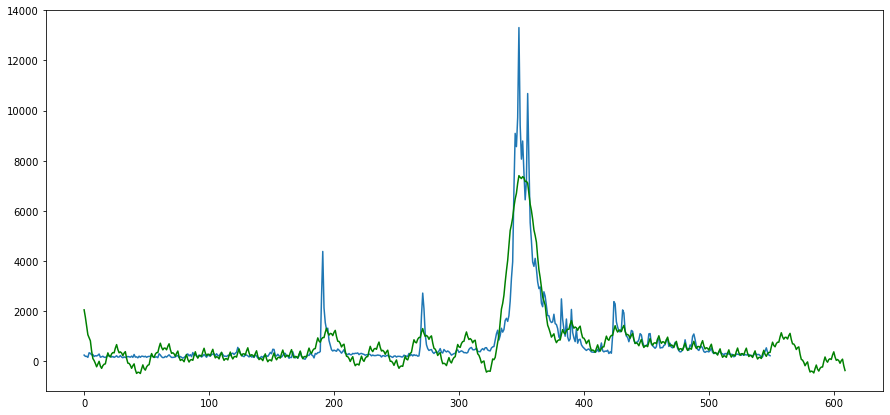

In [23]:
# Plotting both the Actual values and Predict values at the same graph for comparison
plt.figure(figsize=(15, 7))
plt.plot(df.y)                  # Actual values in default blue color
plt.plot(forecast.yhat, "g");

## 3.5 Prophet - All parameters

In [24]:
m.params

{'k': array([[0.15776188]]),
 'm': array([[0.01671978]]),
 'delta': array([[-8.94336632e-08, -3.03779263e-07, -3.48167154e-07,
         -3.02141169e-06, -1.50852121e-06, -2.67705770e-06,
         -3.05898100e-03, -3.72412083e-05, -1.09892915e-05,
         -1.15954901e-03, -6.11248621e-03, -5.01387688e-03,
         -2.58742382e-03, -3.30703018e-03, -6.90122428e-03,
         -1.78938473e-02, -2.41580567e-02, -3.80314537e-02,
         -3.23630611e-02, -6.68138005e-02, -4.58809452e-02,
         -2.01095632e-02, -5.50215443e-07, -4.21491039e-07,
         -5.07289963e-08]]),
 'sigma_obs': array([[0.04545668]]),
 'beta': array([[-2.44813568e-03, -6.34677192e-02, -2.35579716e-02,
          5.90956839e-02,  4.12753892e-02, -3.73215234e-02,
         -4.37535305e-02,  3.67440381e-02,  5.52868403e-02,
         -9.03398378e-03, -3.66848874e-02, -7.74852883e-04,
          3.42322114e-02,  1.64105203e-02, -2.21006358e-02,
         -2.08259520e-02,  2.43216947e-02,  3.21552513e-02,
          2.6281228

## 3.6 Prophet - Cross Validation

In [25]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return 200 * np.mean(diff)

In [26]:
smape_single_page = smape(df.y, forecast.yhat)
smape_single_page

63.87910263908972

In [27]:
from fbprophet.diagnostics import cross_validation

In [28]:
cv_results = cross_validation(m, initial='360 days', period='30 days', horizon='60 days')
smape_baseline = smape(cv_results.y, cv_results.yhat)
smape_baseline

INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-07-04 00:00:00 and 2016-11-01 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

58.746557712606084

# 4 Predication by trainned Prophet and submission 

In [30]:
df

,ds,y,cap,floor
0,2015-07-01,252.0,200,0.0
1,2015-07-02,201.0,200,0.0
2,2015-07-03,202.0,200,0.0
3,2015-07-04,161.0,200,0.0
4,2015-07-05,344.0,200,0.0
...,...,...,...,...
545,2016-12-27,402.0,200,0.0
546,2016-12-28,541.0,200,0.0
547,2016-12-29,361.0,200,0.0
548,2016-12-30,257.0,200,0.0


In [31]:
all_pages=train_1["Page"]
all_pages

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

In [32]:
# Transposing train_1  have Date Time at the index
train1_allT = train_1.drop('Page', axis=1).T
train1_allT.columns = train_1.Page.values
train1_allT

,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,20.0,30.0,4.0,11.0,11.0,19.0,4.0,23.0,30.0,29.0,...,8.0,7.0,4.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN
2016-12-28,22.0,52.0,6.0,17.0,27.0,23.0,15.0,32.0,36.0,35.0,...,21.0,13.0,2.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2016-12-29,19.0,45.0,3.0,19.0,13.0,17.0,6.0,39.0,38.0,44.0,...,14.0,12.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2016-12-30,18.0,26.0,4.0,10.0,36.0,17.0,8.0,32.0,31.0,26.0,...,24.0,31.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [35]:
page=all_pages[0]
df = pd.DataFrame(train1_allT, columns = ['Date',page]) 
df = df.rename(columns={'Date':'ds', page:'y'})
df

,ds,y
2015-07-01,NaN,18.0
2015-07-02,NaN,11.0
2015-07-03,NaN,5.0
2015-07-04,NaN,13.0
2015-07-05,NaN,14.0
...,...,...
2016-12-27,NaN,20.0
2016-12-28,NaN,22.0
2016-12-29,NaN,19.0
2016-12-30,NaN,18.0


In [36]:
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,222.590465,1346.502767,2837.603611,222.590465,222.590465,1833.268780,1833.268780,1833.268780,-117.141816,...,-106.637353,-106.637353,-106.637353,2057.047949,2057.047949,2057.047949,0.0,0.0,0.0,2055.859245
1,2015-07-02,226.416119,943.077341,2532.793790,226.416119,226.416119,1536.970097,1536.970097,1536.970097,-117.141816,...,-40.619839,-40.619839,-40.619839,1694.731752,1694.731752,1694.731752,0.0,0.0,0.0,1763.386216
2,2015-07-03,230.241772,609.390157,2177.436505,230.241772,230.241772,1196.209435,1196.209435,1196.209435,-117.141816,...,-40.525102,-40.525102,-40.525102,1353.876353,1353.876353,1353.876353,0.0,0.0,0.0,1426.451207
3,2015-07-04,234.067426,310.436394,1858.847927,234.067426,234.067426,829.634336,829.634336,829.634336,-117.141816,...,-91.835324,-91.835324,-91.835324,1038.611475,1038.611475,1038.611475,0.0,0.0,0.0,1063.701762
4,2015-07-05,237.893080,180.889499,1730.951108,237.893080,237.893080,707.456253,707.456253,707.456253,-117.141816,...,72.263555,72.263555,72.263555,752.334514,752.334514,752.334514,0.0,0.0,0.0,945.349333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2017-02-25,690.041996,-813.810915,707.299437,668.027948,711.799235,-763.988250,-763.988250,-763.988250,-117.141816,...,-91.835324,-91.835324,-91.835324,-555.011110,-555.011110,-555.011110,0.0,0.0,0.0,-73.946254
606,2017-02-26,687.236648,-740.362318,780.499181,664.736748,709.369812,-658.283779,-658.283779,-658.283779,-117.141816,...,72.263555,72.263555,72.263555,-613.405518,-613.405518,-613.405518,0.0,0.0,0.0,28.952870
607,2017-02-27,684.431300,-692.111181,841.919984,661.521765,706.953856,-595.497754,-595.497754,-595.497754,-117.141816,...,199.703756,199.703756,199.703756,-678.059694,-678.059694,-678.059694,0.0,0.0,0.0,88.933547
608,2017-02-28,681.625952,-966.762273,587.036300,658.061986,704.855627,-856.545787,-856.545787,-856.545787,-117.141816,...,7.650306,7.650306,7.650306,-747.054277,-747.054277,-747.054277,0.0,0.0,0.0,-174.919834


In [41]:
result = forecast['yhat']
sub_result=result.iloc[-60:]
sub_result.shape

(60,)

In [43]:
key_1.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [59]:
key_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703780 entries, 0 to 8703779
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Page    object
 1   Id      object
dtypes: object(2)
memory usage: 132.8+ MB


In [74]:
key_1.iloc[0,0]

'!vote_en.wikipedia.org_all-access_all-agents_2017-01-01'

In [79]:
i=0

In [ ]:
i=0
for page in all_pages:
    
    df = pd.DataFrame(train1_allT, columns = ['Date',page]) 
    df = df.rename(columns={'Date':'ds', page:'y'})
    #m = Prophet()
    #m.fit(df)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
    result = forecast['yhat']
    sub_result = result.iloc[-60:]
    listOfIds= key_1.index[key_1['Page'].str.contains(page)].values.tolist()
    if (len(listOfIds)==60):
        sub_1.iloc[listOfIds,1]=sub_result.values.round() 
        print("i=%i"%i,len(sub_result),len(listOfIds))
    i=i+1


i=0 60 60
i=1 60 60
i=2 60 60
i=3 60 60
i=4 60 60
i=5 60 60
i=6 60 60
i=7 60 60
i=8 60 60
i=9 60 60
i=10 60 60
i=11 60 60
i=12 60 60
i=13 60 60
i=14 60 60
i=15 60 60
i=16 60 60
i=17 60 60
i=18 60 60
i=19 60 60
i=20 60 60
i=21 60 60
i=22 60 60
i=23 60 60
i=24 60 60
i=25 60 60
i=26 60 60
i=27 60 60
i=28 60 60
i=29 60 60
i=30 60 60
i=31 60 60
i=32 60 60
i=33 60 60
i=34 60 60
i=35 60 60
i=36 60 60
i=37 60 60
i=38 60 60
i=39 60 60
i=40 60 60
i=41 60 60
i=42 60 60
i=43 60 60
i=44 60 60
i=45 60 60
i=46 60 60
i=47 60 60
i=48 60 60
i=49 60 60
i=50 60 60
i=51 60 60
i=52 60 60
i=53 60 60
i=54 60 60
i=55 60 60
i=56 60 60
i=57 60 60
i=58 60 60
i=59 60 60
i=60 60 60
i=61 60 60
i=62 60 60
i=63 60 60
i=64 60 60
i=65 60 60
i=66 60 60
i=67 60 60
i=68 60 60
i=69 60 60
i=70 60 60
i=71 60 60
i=72 60 60
i=73 60 60
i=74 60 60
i=75 60 60
i=76 60 60
i=77 60 60
i=78 60 60
i=79 60 60
i=80 60 60
i=81 60 60
i=82 60 60
i=83 60 60
i=84 60 60
i=85 60 60
i=86 60 60
i=87 60 60
i=88 60 60
i=89 60 60
i=90 60 60
i=91 60 6

C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=180 60 60
i=181 60 60
i=182 60 60
i=183 60 60
i=184 60 60
i=185 60 60
i=186 60 60
i=187 60 60
i=188 60 60
i=189 60 60
i=190 60 60
i=191 60 60
i=192 60 60
i=193 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=195 60 60
i=196 60 60
i=197 60 60
i=198 60 60
i=199 60 60
i=200 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=203 60 60
i=204 60 60
i=205 60 60
i=206 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=208 60 60
i=209 60 60
i=210 60 60
i=211 60 60
i=212 60 60
i=213 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=215 60 60
i=216 60 60
i=217 60 60
i=218 60 60
i=219 60 60
i=220 60 60
i=221 60 60
i=222 60 60
i=223 60 60
i=224 60 60
i=225 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=227 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=229 60 60
i=230 60 60
i=231 60 60
i=232 60 60
i=233 60 60
i=234 60 60
i=235 60 60
i=236 60 60
i=237 60 60
i=238 60 60
i=239 60 60
i=240 60 60
i=241 60 60
i=242 60 60
i=243 60 60
i=244 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=246 60 60
i=247 60 60
i=248 60 60
i=249 60 60
i=250 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=252 60 60
i=253 60 60
i=254 60 60
i=255 60 60
i=256 60 60
i=257 60 60
i=258 60 60
i=259 60 60
i=260 60 60
i=261 60 60
i=262 60 60
i=263 60 60
i=264 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=266 60 60
i=267 60 60
i=268 60 60
i=269 60 60
i=270 60 60
i=271 60 60
i=272 60 60
i=273 60 60
i=274 60 60
i=275 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=277 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=282 60 60
i=283 60 60
i=284 60 60
i=285 60 60
i=286 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=288 60 60
i=289 60 60
i=290 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=293 60 60
i=294 60 60
i=295 60 60
i=296 60 60
i=297 60 60
i=298 60 60
i=299 60 60
i=301 60 60
i=302 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=304 60 60
i=305 60 60
i=306 60 60
i=307 60 60
i=308 60 60
i=309 60 60
i=310 60 60
i=311 60 60
i=312 60 60
i=313 60 60
i=314 60 60
i=315 60 60
i=316 60 60
i=317 60 60
i=318 60 60
i=319 60 60
i=320 60 60
i=321 60 60
i=322 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=324 60 60
i=325 60 60
i=326 60 60
i=327 60 60
i=328 60 60
i=329 60 60
i=330 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=333 60 60
i=334 60 60
i=335 60 60
i=336 60 60
i=338 60 60
i=339 60 60
i=340 60 60
i=341 60 60
i=342 60 60
i=343 60 60
i=344 60 60
i=345 60 60
i=346 60 60
i=347 60 60
i=348 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=351 60 60
i=352 60 60
i=353 60 60
i=354 60 60
i=355 60 60
i=356 60 60
i=357 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=359 60 60
i=360 60 60
i=361 60 60
i=362 60 60
i=363 60 60
i=364 60 60
i=365 60 60
i=366 60 60
i=367 60 60
i=368 60 60
i=369 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=371 60 60
i=372 60 60
i=373 60 60
i=374 60 60
i=375 60 60
i=376 60 60
i=377 60 60
i=378 60 60
i=379 60 60
i=380 60 60
i=381 60 60
i=382 60 60
i=383 60 60
i=384 60 60
i=385 60 60
i=386 60 60
i=387 60 60
i=388 60 60
i=389 60 60
i=390 60 60
i=391 60 60
i=392 60 60
i=393 60 60
i=394 60 60
i=395 60 60
i=396 60 60
i=397 60 60
i=398 60 60
i=399 60 60
i=400 60 60
i=401 60 60
i=402 60 60
i=403 60 60
i=404 60 60
i=405 60 60
i=406 60 60
i=407 60 60
i=408 60 60
i=409 60 60
i=410 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=413 60 60
i=414 60 60
i=415 60 60
i=416 60 60
i=417 60 60
i=418 60 60
i=419 60 60
i=420 60 60
i=421 60 60
i=422 60 60
i=423 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=425 60 60
i=426 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=428 60 60
i=429 60 60
i=430 60 60
i=431 60 60
i=432 60 60
i=433 60 60
i=434 60 60
i=435 60 60
i=436 60 60
i=437 60 60
i=438 60 60
i=439 60 60
i=440 60 60
i=441 60 60
i=443 60 60
i=444 60 60
i=445 60 60
i=446 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=448 60 60
i=449 60 60
i=450 60 60
i=451 60 60
i=452 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=454 60 60
i=455 60 60
i=456 60 60
i=457 60 60
i=458 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=460 60 60
i=461 60 60
i=462 60 60
i=463 60 60
i=464 60 60
i=465 60 60
i=466 60 60
i=467 60 60
i=468 60 60
i=469 60 60
i=470 60 60
i=471 60 60
i=472 60 60
i=473 60 60
i=474 60 60
i=475 60 60
i=476 60 60
i=477 60 60
i=478 60 60
i=479 60 60
i=480 60 60
i=481 60 60
i=482 60 60
i=483 60 60
i=484 60 60
i=485 60 60
i=486 60 60
i=487 60 60
i=488 60 60
i=489 60 60
i=490 60 60
i=491 60 60
i=492 60 60
i=493 60 60
i=494 60 60
i=495 60 60
i=496 60 60
i=497 60 60
i=498 60 60
i=499 60 60
i=500 60 60
i=501 60 60
i=502 60 60
i=503 60 60
i=504 60 60
i=505 60 60
i=506 60 60
i=507 60 60
i=508 60 60
i=509 60 60
i=510 60 60
i=511 60 60
i=512 60 60
i=513 60 60
i=514 60 60
i=515 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=517 60 60
i=518 60 60
i=519 60 60
i=520 60 60
i=521 60 60
i=522 60 60
i=523 60 60
i=524 60 60
i=525 60 60
i=526 60 60
i=527 60 60
i=528 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=530 60 60
i=531 60 60
i=532 60 60
i=533 60 60
i=534 60 60
i=535 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=537 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=539 60 60
i=540 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=542 60 60
i=543 60 60
i=544 60 60
i=545 60 60
i=546 60 60
i=547 60 60
i=548 60 60
i=549 60 60
i=550 60 60
i=551 60 60
i=552 60 60
i=553 60 60
i=554 60 60
i=555 60 60
i=556 60 60
i=557 60 60
i=558 60 60
i=559 60 60
i=560 60 60
i=561 60 60
i=562 60 60
i=563 60 60
i=564 60 60
i=565 60 60
i=566 60 60
i=567 60 60
i=568 60 60
i=569 60 60
i=570 60 60
i=571 60 60
i=572 60 60
i=573 60 60
i=574 60 60
i=575 60 60
i=576 60 60
i=577 60 60
i=578 60 60
i=579 60 60
i=580 60 60
i=581 60 60
i=582 60 60
i=583 60 60
i=584 60 60
i=585 60 60
i=586 60 60
i=587 60 60
i=588 60 60
i=589 60 60
i=590 60 60
i=591 60 60
i=592 60 60
i=593 60 60
i=594 60 60
i=595 60 60
i=596 60 60
i=597 60 60
i=598 60 60
i=599 60 60
i=600 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=602 60 60
i=603 60 60
i=604 60 60
i=605 60 60
i=606 60 60
i=607 60 60
i=608 60 60
i=609 60 60
i=610 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=612 60 60
i=613 60 60
i=614 60 60
i=615 60 60
i=616 60 60
i=617 60 60
i=618 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=620 60 60
i=621 60 60
i=622 60 60
i=623 60 60
i=624 60 60
i=625 60 60
i=626 60 60
i=627 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=629 60 60
i=630 60 60
i=631 60 60
i=632 60 60
i=633 60 60
i=634 60 60
i=635 60 60
i=636 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=638 60 60
i=639 60 60
i=640 60 60
i=641 60 60
i=642 60 60
i=643 60 60
i=644 60 60
i=645 60 60
i=646 60 60
i=647 60 60
i=648 60 60
i=649 60 60
i=650 60 60
i=651 60 60
i=652 60 60
i=653 60 60
i=654 60 60
i=655 60 60
i=656 60 60
i=657 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=659 60 60
i=660 60 60
i=661 60 60
i=662 60 60
i=663 60 60
i=664 60 60
i=665 60 60
i=666 60 60
i=667 60 60
i=668 60 60
i=669 60 60
i=670 60 60
i=671 60 60
i=672 60 60
i=673 60 60
i=674 60 60
i=675 60 60
i=676 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=678 60 60
i=679 60 60
i=680 60 60
i=681 60 60
i=682 60 60
i=683 60 60
i=684 60 60
i=685 60 60
i=686 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=688 60 60
i=689 60 60
i=690 60 60
i=691 60 60
i=692 60 60
i=693 60 60
i=694 60 60
i=695 60 60
i=696 60 60
i=697 60 60
i=698 60 60
i=699 60 60
i=700 60 60
i=701 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=703 60 60
i=704 60 60
i=705 60 60
i=706 60 60
i=707 60 60
i=708 60 60
i=709 60 60
i=710 60 60
i=711 60 60
i=712 60 60
i=713 60 60
i=714 60 60
i=715 60 60
i=716 60 60
i=717 60 60
i=718 60 60
i=719 60 60
i=720 60 60
i=721 60 60
i=722 60 60
i=723 60 60
i=724 60 60
i=725 60 60
i=726 60 60
i=727 60 60
i=728 60 60
i=729 60 60
i=730 60 60
i=731 60 60
i=732 60 60
i=733 60 60
i=734 60 60
i=735 60 60
i=736 60 60
i=737 60 60
i=738 60 60
i=739 60 60
i=740 60 60
i=741 60 60
i=742 60 60
i=743 60 60
i=744 60 60
i=745 60 60
i=746 60 60
i=747 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=749 60 60
i=750 60 60
i=751 60 60
i=752 60 60
i=753 60 60
i=754 60 60
i=755 60 60
i=756 60 60
i=757 60 60
i=758 60 60
i=759 60 60
i=760 60 60
i=761 60 60
i=762 60 60
i=763 60 60
i=764 60 60
i=765 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=767 60 60
i=768 60 60
i=769 60 60
i=770 60 60
i=771 60 60
i=772 60 60
i=773 60 60
i=774 60 60
i=775 60 60
i=776 60 60
i=777 60 60
i=778 60 60
i=779 60 60
i=780 60 60
i=781 60 60
i=782 60 60
i=783 60 60
i=784 60 60
i=785 60 60
i=786 60 60
i=787 60 60
i=788 60 60
i=789 60 60
i=790 60 60
i=791 60 60
i=792 60 60
i=794 60 60
i=795 60 60
i=796 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=798 60 60
i=799 60 60
i=800 60 60
i=801 60 60
i=802 60 60
i=803 60 60
i=804 60 60
i=805 60 60
i=806 60 60
i=807 60 60
i=808 60 60
i=809 60 60
i=810 60 60
i=811 60 60
i=812 60 60
i=813 60 60
i=814 60 60
i=815 60 60
i=816 60 60
i=817 60 60
i=818 60 60
i=819 60 60
i=820 60 60
i=821 60 60
i=822 60 60
i=823 60 60
i=824 60 60
i=825 60 60
i=826 60 60
i=827 60 60
i=828 60 60
i=829 60 60
i=830 60 60
i=831 60 60
i=832 60 60
i=833 60 60
i=834 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=837 60 60
i=838 60 60
i=839 60 60
i=840 60 60
i=841 60 60
i=842 60 60
i=843 60 60
i=844 60 60
i=845 60 60
i=846 60 60
i=847 60 60
i=848 60 60
i=850 60 60
i=851 60 60
i=852 60 60
i=853 60 60
i=854 60 60
i=855 60 60
i=856 60 60
i=857 60 60
i=858 60 60
i=859 60 60
i=860 60 60
i=861 60 60
i=862 60 60
i=863 60 60
i=864 60 60
i=865 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=867 60 60
i=868 60 60
i=869 60 60
i=870 60 60
i=871 60 60
i=872 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=874 60 60
i=875 60 60
i=876 60 60
i=877 60 60
i=878 60 60
i=879 60 60
i=881 60 60
i=882 60 60
i=883 60 60
i=884 60 60
i=885 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=887 60 60
i=888 60 60
i=889 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=891 60 60
i=892 60 60
i=893 60 60
i=894 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=896 60 60
i=897 60 60
i=898 60 60
i=899 60 60
i=900 60 60
i=901 60 60
i=902 60 60
i=903 60 60
i=904 60 60
i=905 60 60
i=906 60 60
i=907 60 60
i=908 60 60
i=909 60 60
i=910 60 60
i=911 60 60
i=912 60 60
i=913 60 60
i=914 60 60
i=915 60 60
i=916 60 60
i=917 60 60
i=918 60 60
i=919 60 60
i=920 60 60
i=922 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=924 60 60
i=925 60 60
i=926 60 60
i=927 60 60
i=928 60 60
i=929 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=931 60 60
i=932 60 60
i=933 60 60
i=934 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=936 60 60
i=937 60 60
i=938 60 60
i=939 60 60
i=940 60 60
i=941 60 60
i=942 60 60
i=943 60 60
i=944 60 60
i=945 60 60
i=946 60 60
i=947 60 60
i=948 60 60
i=949 60 60
i=950 60 60
i=951 60 60
i=952 60 60
i=953 60 60
i=954 60 60
i=955 60 60
i=956 60 60
i=957 60 60
i=958 60 60
i=959 60 60
i=960 60 60
i=961 60 60
i=962 60 60
i=963 60 60
i=964 60 60
i=965 60 60
i=967 60 60
i=968 60 60
i=969 60 60
i=970 60 60
i=971 60 60
i=972 60 60
i=974 60 60
i=975 60 60
i=976 60 60
i=977 60 60
i=978 60 60
i=979 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=981 60 60
i=982 60 60
i=983 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=985 60 60
i=986 60 60
i=987 60 60
i=988 60 60
i=989 60 60
i=990 60 60
i=991 60 60
i=992 60 60
i=993 60 60
i=994 60 60
i=995 60 60
i=996 60 60
i=997 60 60
i=998 60 60
i=999 60 60
i=1000 60 60
i=1001 60 60
i=1002 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1004 60 60
i=1005 60 60
i=1006 60 60
i=1007 60 60
i=1008 60 60
i=1009 60 60
i=1010 60 60
i=1011 60 60
i=1012 60 60
i=1013 60 60
i=1014 60 60
i=1015 60 60
i=1016 60 60
i=1017 60 60
i=1018 60 60
i=1019 60 60
i=1020 60 60
i=1021 60 60
i=1022 60 60
i=1023 60 60
i=1024 60 60
i=1025 60 60
i=1026 60 60
i=1027 60 60
i=1028 60 60
i=1029 60 60
i=1030 60 60
i=1031 60 60
i=1032 60 60
i=1033 60 60
i=1034 60 60
i=1035 60 60
i=1036 60 60
i=1037 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1039 60 60
i=1040 60 60
i=1041 60 60
i=1042 60 60
i=1043 60 60
i=1044 60 60
i=1045 60 60
i=1046 60 60
i=1047 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1049 60 60
i=1050 60 60
i=1051 60 60
i=1052 60 60
i=1053 60 60
i=1054 60 60
i=1055 60 60
i=1056 60 60
i=1057 60 60
i=1058 60 60
i=1059 60 60
i=1060 60 60
i=1061 60 60
i=1062 60 60
i=1063 60 60
i=1064 60 60
i=1065 60 60
i=1066 60 60
i=1067 60 60
i=1068 60 60
i=1069 60 60
i=1070 60 60
i=1071 60 60
i=1072 60 60
i=1073 60 60
i=1074 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1076 60 60
i=1077 60 60
i=1078 60 60
i=1079 60 60
i=1080 60 60
i=1081 60 60
i=1082 60 60
i=1083 60 60
i=1084 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1086 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1088 60 60
i=1089 60 60
i=1090 60 60
i=1091 60 60
i=1092 60 60
i=1094 60 60
i=1095 60 60
i=1096 60 60
i=1097 60 60
i=1098 60 60
i=1099 60 60
i=1100 60 60
i=1101 60 60
i=1102 60 60
i=1103 60 60
i=1104 60 60
i=1105 60 60
i=1106 60 60
i=1107 60 60
i=1108 60 60
i=1109 60 60
i=1110 60 60
i=1111 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1113 60 60
i=1114 60 60
i=1115 60 60
i=1116 60 60
i=1117 60 60
i=1118 60 60
i=1119 60 60
i=1120 60 60
i=1121 60 60
i=1122 60 60
i=1123 60 60
i=1124 60 60
i=1125 60 60
i=1126 60 60
i=1128 60 60
i=1129 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1131 60 60
i=1132 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1134 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1136 60 60
i=1137 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1140 60 60
i=1141 60 60
i=1142 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1144 60 60
i=1145 60 60
i=1146 60 60
i=1147 60 60
i=1148 60 60
i=1149 60 60
i=1150 60 60
i=1151 60 60
i=1152 60 60
i=1153 60 60
i=1154 60 60
i=1155 60 60
i=1156 60 60
i=1157 60 60
i=1158 60 60
i=1159 60 60
i=1160 60 60
i=1161 60 60
i=1162 60 60
i=1163 60 60
i=1164 60 60
i=1165 60 60
i=1166 60 60
i=1167 60 60
i=1168 60 60
i=1169 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1172 60 60
i=1173 60 60
i=1174 60 60
i=1175 60 60
i=1176 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1178 60 60
i=1179 60 60
i=1180 60 60
i=1181 60 60
i=1182 60 60
i=1183 60 60
i=1184 60 60
i=1185 60 60
i=1186 60 60
i=1187 60 60
i=1188 60 60
i=1189 60 60
i=1190 60 60
i=1191 60 60
i=1192 60 60
i=1193 60 60
i=1194 60 60
i=1195 60 60
i=1196 60 60
i=1197 60 60
i=1198 60 60
i=1199 60 60
i=1200 60 60
i=1201 60 60
i=1202 60 60
i=1203 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1205 60 60
i=1206 60 60
i=1207 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1209 60 60
i=1210 60 60
i=1211 60 60
i=1212 60 60
i=1213 60 60
i=1214 60 60
i=1215 60 60
i=1216 60 60
i=1217 60 60
i=1218 60 60
i=1219 60 60
i=1220 60 60
i=1221 60 60
i=1222 60 60
i=1223 60 60
i=1224 60 60
i=1225 60 60
i=1226 60 60
i=1227 60 60
i=1228 60 60
i=1229 60 60
i=1230 60 60
i=1231 60 60
i=1232 60 60
i=1233 60 60
i=1234 60 60
i=1235 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1237 60 60
i=1238 60 60
i=1239 60 60
i=1240 60 60
i=1241 60 60
i=1242 60 60
i=1243 60 60
i=1244 60 60
i=1245 60 60
i=1246 60 60
i=1247 60 60
i=1248 60 60
i=1249 60 60
i=1250 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1252 60 60
i=1253 60 60
i=1254 60 60
i=1255 60 60
i=1256 60 60
i=1257 60 60
i=1258 60 60
i=1259 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1261 60 60
i=1262 60 60
i=1263 60 60
i=1264 60 60
i=1265 60 60
i=1266 60 60
i=1267 60 60
i=1268 60 60
i=1269 60 60
i=1270 60 60
i=1271 60 60
i=1272 60 60
i=1273 60 60
i=1274 60 60
i=1275 60 60
i=1276 60 60
i=1277 60 60
i=1278 60 60
i=1279 60 60
i=1280 60 60
i=1281 60 60
i=1282 60 60
i=1283 60 60
i=1284 60 60
i=1285 60 60
i=1286 60 60
i=1287 60 60
i=1288 60 60
i=1289 60 60
i=1290 60 60
i=1291 60 60
i=1292 60 60
i=1293 60 60
i=1294 60 60
i=1295 60 60
i=1296 60 60
i=1297 60 60
i=1298 60 60
i=1299 60 60
i=1300 60 60
i=1301 60 60
i=1302 60 60
i=1303 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1305 60 60
i=1306 60 60
i=1307 60 60
i=1308 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1310 60 60
i=1311 60 60
i=1312 60 60
i=1313 60 60
i=1314 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1316 60 60
i=1317 60 60
i=1318 60 60
i=1319 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1321 60 60
i=1322 60 60
i=1323 60 60
i=1324 60 60
i=1325 60 60
i=1326 60 60
i=1327 60 60
i=1328 60 60
i=1329 60 60
i=1330 60 60
i=1331 60 60
i=1332 60 60
i=1333 60 60
i=1334 60 60
i=1335 60 60
i=1336 60 60
i=1337 60 60
i=1338 60 60
i=1339 60 60
i=1340 60 60
i=1341 60 60
i=1342 60 60
i=1343 60 60
i=1344 60 60
i=1345 60 60
i=1346 60 60
i=1347 60 60
i=1348 60 60
i=1349 60 60
i=1350 60 60
i=1351 60 60
i=1352 60 60
i=1353 60 60
i=1354 60 60
i=1355 60 60
i=1356 60 60
i=1357 60 60
i=1358 60 60
i=1359 60 60
i=1360 60 60
i=1361 60 60
i=1362 60 60
i=1363 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1365 60 60
i=1366 60 60
i=1367 60 60
i=1368 60 60
i=1369 60 60
i=1370 60 60
i=1371 60 60
i=1372 60 60
i=1373 60 60
i=1374 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1376 60 60
i=1377 60 60
i=1378 60 60
i=1379 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1381 60 60
i=1382 60 60
i=1383 60 60
i=1384 60 60
i=1385 60 60
i=1386 60 60
i=1387 60 60
i=1388 60 60
i=1389 60 60
i=1390 60 60
i=1391 60 60
i=1392 60 60
i=1393 60 60
i=1394 60 60
i=1395 60 60
i=1396 60 60
i=1397 60 60
i=1398 60 60
i=1399 60 60
i=1400 60 60
i=1401 60 60
i=1402 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1404 60 60
i=1405 60 60
i=1406 60 60
i=1407 60 60
i=1408 60 60
i=1409 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1411 60 60
i=1412 60 60
i=1413 60 60
i=1414 60 60
i=1415 60 60
i=1416 60 60
i=1417 60 60
i=1418 60 60
i=1419 60 60
i=1420 60 60
i=1421 60 60
i=1422 60 60
i=1423 60 60
i=1424 60 60
i=1425 60 60
i=1426 60 60
i=1427 60 60
i=1428 60 60
i=1429 60 60
i=1430 60 60
i=1431 60 60
i=1432 60 60
i=1433 60 60
i=1434 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1436 60 60
i=1437 60 60
i=1438 60 60
i=1439 60 60
i=1440 60 60
i=1441 60 60
i=1442 60 60
i=1443 60 60
i=1444 60 60
i=1445 60 60
i=1446 60 60
i=1447 60 60
i=1448 60 60
i=1449 60 60
i=1450 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1452 60 60
i=1453 60 60
i=1454 60 60
i=1455 60 60
i=1456 60 60
i=1457 60 60
i=1458 60 60
i=1459 60 60
i=1460 60 60
i=1461 60 60
i=1462 60 60
i=1463 60 60
i=1464 60 60
i=1465 60 60
i=1466 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1468 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1470 60 60
i=1471 60 60
i=1472 60 60
i=1473 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1475 60 60
i=1476 60 60
i=1477 60 60
i=1478 60 60
i=1479 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1481 60 60
i=1482 60 60
i=1483 60 60
i=1484 60 60
i=1486 60 60
i=1487 60 60
i=1488 60 60
i=1489 60 60
i=1490 60 60
i=1491 60 60
i=1492 60 60
i=1493 60 60
i=1494 60 60
i=1495 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1497 60 60
i=1499 60 60
i=1500 60 60
i=1501 60 60
i=1502 60 60
i=1503 60 60
i=1504 60 60
i=1505 60 60
i=1506 60 60
i=1507 60 60
i=1508 60 60
i=1509 60 60
i=1510 60 60
i=1511 60 60
i=1512 60 60
i=1513 60 60
i=1514 60 60
i=1515 60 60
i=1516 60 60
i=1517 60 60
i=1518 60 60
i=1519 60 60
i=1520 60 60
i=1521 60 60
i=1522 60 60
i=1523 60 60
i=1524 60 60
i=1525 60 60
i=1526 60 60
i=1527 60 60
i=1528 60 60
i=1529 60 60
i=1530 60 60
i=1531 60 60
i=1532 60 60
i=1533 60 60
i=1534 60 60
i=1535 60 60
i=1536 60 60
i=1537 60 60
i=1538 60 60
i=1539 60 60
i=1540 60 60
i=1541 60 60
i=1542 60 60
i=1543 60 60
i=1544 60 60
i=1545 60 60
i=1546 60 60
i=1547 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1549 60 60
i=1550 60 60
i=1551 60 60
i=1552 60 60
i=1553 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1555 60 60
i=1556 60 60
i=1557 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1559 60 60
i=1560 60 60
i=1561 60 60
i=1562 60 60
i=1563 60 60
i=1564 60 60
i=1565 60 60
i=1566 60 60
i=1567 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1569 60 60
i=1570 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1573 60 60
i=1574 60 60
i=1575 60 60
i=1576 60 60
i=1577 60 60
i=1578 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1580 60 60
i=1581 60 60
i=1582 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1584 60 60
i=1585 60 60
i=1586 60 60
i=1587 60 60
i=1588 60 60
i=1589 60 60
i=1590 60 60
i=1591 60 60
i=1592 60 60
i=1593 60 60
i=1594 60 60
i=1595 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1598 60 60
i=1599 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1601 60 60
i=1602 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1604 60 60
i=1605 60 60
i=1606 60 60
i=1607 60 60
i=1608 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1610 60 60
i=1611 60 60
i=1612 60 60
i=1613 60 60
i=1614 60 60
i=1615 60 60
i=1616 60 60
i=1617 60 60
i=1618 60 60
i=1619 60 60
i=1620 60 60
i=1621 60 60
i=1622 60 60
i=1623 60 60
i=1624 60 60
i=1625 60 60
i=1626 60 60
i=1627 60 60
i=1628 60 60
i=1629 60 60
i=1630 60 60
i=1631 60 60
i=1632 60 60
i=1633 60 60
i=1634 60 60
i=1636 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1638 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1640 60 60
i=1641 60 60
i=1642 60 60
i=1643 60 60
i=1644 60 60
i=1645 60 60
i=1646 60 60
i=1647 60 60
i=1648 60 60
i=1649 60 60
i=1650 60 60
i=1651 60 60
i=1652 60 60
i=1653 60 60
i=1654 60 60
i=1655 60 60
i=1656 60 60
i=1657 60 60
i=1658 60 60
i=1660 60 60
i=1661 60 60
i=1662 60 60
i=1663 60 60
i=1664 60 60
i=1665 60 60
i=1666 60 60
i=1667 60 60
i=1668 60 60
i=1669 60 60
i=1670 60 60
i=1671 60 60
i=1672 60 60
i=1673 60 60
i=1674 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1676 60 60
i=1677 60 60
i=1678 60 60
i=1679 60 60
i=1680 60 60
i=1681 60 60
i=1682 60 60
i=1683 60 60
i=1684 60 60
i=1685 60 60
i=1686 60 60
i=1687 60 60
i=1688 60 60
i=1689 60 60
i=1690 60 60
i=1691 60 60
i=1693 60 60
i=1694 60 60
i=1695 60 60
i=1696 60 60
i=1697 60 60
i=1698 60 60
i=1699 60 60
i=1700 60 60
i=1701 60 60
i=1702 60 60
i=1703 60 60
i=1704 60 60
i=1705 60 60
i=1706 60 60
i=1707 60 60
i=1708 60 60
i=1709 60 60
i=1710 60 60
i=1711 60 60
i=1712 60 60
i=1713 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1715 60 60
i=1716 60 60
i=1717 60 60
i=1718 60 60
i=1719 60 60
i=1720 60 60
i=1721 60 60
i=1722 60 60
i=1723 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1725 60 60
i=1726 60 60
i=1727 60 60
i=1728 60 60
i=1729 60 60
i=1730 60 60
i=1731 60 60
i=1732 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1734 60 60
i=1735 60 60
i=1736 60 60
i=1737 60 60
i=1738 60 60
i=1739 60 60
i=1740 60 60
i=1741 60 60
i=1742 60 60
i=1743 60 60
i=1744 60 60
i=1745 60 60
i=1746 60 60
i=1747 60 60
i=1748 60 60
i=1749 60 60
i=1750 60 60
i=1751 60 60
i=1752 60 60
i=1753 60 60
i=1754 60 60
i=1755 60 60
i=1756 60 60
i=1757 60 60
i=1758 60 60
i=1760 60 60
i=1761 60 60
i=1762 60 60
i=1763 60 60
i=1764 60 60
i=1765 60 60
i=1766 60 60
i=1767 60 60
i=1768 60 60
i=1769 60 60
i=1770 60 60
i=1771 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1773 60 60
i=1774 60 60
i=1775 60 60
i=1776 60 60
i=1777 60 60
i=1778 60 60
i=1779 60 60
i=1780 60 60
i=1781 60 60
i=1782 60 60
i=1783 60 60
i=1784 60 60
i=1785 60 60
i=1786 60 60
i=1787 60 60
i=1788 60 60
i=1789 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1791 60 60
i=1792 60 60
i=1793 60 60
i=1794 60 60
i=1795 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1797 60 60
i=1798 60 60
i=1799 60 60
i=1800 60 60
i=1801 60 60
i=1802 60 60
i=1803 60 60
i=1804 60 60
i=1805 60 60
i=1806 60 60
i=1807 60 60
i=1808 60 60
i=1809 60 60
i=1810 60 60
i=1811 60 60
i=1812 60 60
i=1813 60 60
i=1814 60 60
i=1815 60 60
i=1816 60 60
i=1817 60 60
i=1818 60 60
i=1819 60 60
i=1820 60 60
i=1821 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1823 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1825 60 60
i=1826 60 60
i=1827 60 60
i=1828 60 60
i=1829 60 60
i=1830 60 60
i=1831 60 60
i=1832 60 60
i=1833 60 60
i=1834 60 60
i=1835 60 60
i=1836 60 60
i=1837 60 60
i=1838 60 60
i=1839 60 60
i=1840 60 60
i=1841 60 60
i=1842 60 60
i=1843 60 60
i=1844 60 60
i=1845 60 60
i=1846 60 60
i=1847 60 60
i=1848 60 60
i=1849 60 60
i=1850 60 60
i=1851 60 60
i=1852 60 60
i=1853 60 60
i=1854 60 60
i=1855 60 60
i=1856 60 60
i=1857 60 60
i=1858 60 60
i=1859 60 60
i=1860 60 60
i=1861 60 60
i=1862 60 60
i=1863 60 60
i=1864 60 60
i=1865 60 60
i=1866 60 60
i=1867 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1869 60 60
i=1870 60 60
i=1871 60 60
i=1872 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1874 60 60
i=1875 60 60
i=1876 60 60
i=1877 60 60
i=1878 60 60
i=1879 60 60
i=1880 60 60
i=1881 60 60
i=1882 60 60
i=1883 60 60
i=1884 60 60
i=1885 60 60
i=1886 60 60
i=1887 60 60
i=1888 60 60
i=1889 60 60
i=1890 60 60
i=1891 60 60
i=1892 60 60
i=1893 60 60
i=1894 60 60
i=1895 60 60
i=1896 60 60
i=1897 60 60
i=1898 60 60
i=1899 60 60
i=1900 60 60
i=1901 60 60
i=1902 60 60
i=1903 60 60
i=1904 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1906 60 60
i=1907 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1909 60 60
i=1910 60 60
i=1911 60 60
i=1912 60 60
i=1913 60 60
i=1914 60 60
i=1915 60 60
i=1916 60 60
i=1917 60 60
i=1918 60 60
i=1919 60 60
i=1920 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1922 60 60
i=1923 60 60
i=1924 60 60
i=1925 60 60
i=1926 60 60
i=1927 60 60
i=1928 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1930 60 60
i=1931 60 60
i=1932 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1934 60 60
i=1935 60 60
i=1936 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1938 60 60
i=1939 60 60
i=1940 60 60
i=1941 60 60
i=1942 60 60
i=1943 60 60
i=1944 60 60
i=1945 60 60
i=1946 60 60
i=1947 60 60
i=1948 60 60
i=1949 60 60
i=1950 60 60
i=1951 60 60
i=1952 60 60
i=1953 60 60
i=1954 60 60
i=1955 60 60
i=1956 60 60
i=1957 60 60
i=1959 60 60
i=1960 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1962 60 60
i=1963 60 60
i=1964 60 60
i=1965 60 60
i=1966 60 60
i=1967 60 60
i=1968 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1970 60 60
i=1971 60 60
i=1972 60 60
i=1973 60 60
i=1974 60 60
i=1975 60 60
i=1976 60 60
i=1977 60 60
i=1978 60 60
i=1979 60 60
i=1980 60 60
i=1981 60 60
i=1982 60 60
i=1983 60 60
i=1984 60 60
i=1985 60 60
i=1986 60 60
i=1987 60 60
i=1988 60 60
i=1989 60 60
i=1990 60 60
i=1991 60 60
i=1992 60 60
i=1993 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=1995 60 60
i=1997 60 60
i=1998 60 60
i=1999 60 60
i=2000 60 60
i=2001 60 60
i=2002 60 60
i=2003 60 60
i=2004 60 60
i=2005 60 60
i=2006 60 60
i=2007 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2009 60 60
i=2010 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2012 60 60
i=2013 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2015 60 60
i=2016 60 60
i=2018 60 60
i=2019 60 60
i=2020 60 60
i=2021 60 60
i=2022 60 60
i=2023 60 60
i=2024 60 60
i=2025 60 60
i=2026 60 60
i=2027 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2029 60 60
i=2030 60 60
i=2031 60 60
i=2032 60 60
i=2033 60 60
i=2034 60 60
i=2035 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2038 60 60
i=2039 60 60
i=2040 60 60
i=2041 60 60
i=2042 60 60
i=2043 60 60
i=2044 60 60
i=2045 60 60
i=2046 60 60
i=2047 60 60
i=2048 60 60
i=2049 60 60
i=2050 60 60
i=2051 60 60
i=2052 60 60
i=2053 60 60
i=2054 60 60
i=2055 60 60
i=2056 60 60
i=2057 60 60
i=2058 60 60
i=2059 60 60
i=2060 60 60
i=2061 60 60
i=2062 60 60
i=2063 60 60
i=2064 60 60
i=2065 60 60
i=2066 60 60
i=2067 60 60
i=2068 60 60
i=2069 60 60
i=2070 60 60
i=2071 60 60
i=2072 60 60
i=2073 60 60
i=2074 60 60
i=2075 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2078 60 60
i=2079 60 60
i=2080 60 60
i=2081 60 60
i=2082 60 60
i=2083 60 60
i=2084 60 60
i=2085 60 60
i=2086 60 60
i=2087 60 60
i=2088 60 60
i=2089 60 60
i=2090 60 60
i=2091 60 60
i=2092 60 60
i=2093 60 60
i=2094 60 60
i=2095 60 60
i=2096 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2098 60 60
i=2099 60 60
i=2100 60 60
i=2101 60 60
i=2102 60 60
i=2103 60 60
i=2104 60 60
i=2105 60 60
i=2106 60 60
i=2107 60 60
i=2108 60 60
i=2109 60 60
i=2110 60 60
i=2111 60 60
i=2112 60 60
i=2113 60 60
i=2114 60 60
i=2115 60 60
i=2116 60 60
i=2117 60 60
i=2118 60 60
i=2119 60 60
i=2120 60 60
i=2121 60 60
i=2122 60 60
i=2123 60 60
i=2124 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2126 60 60
i=2127 60 60
i=2128 60 60
i=2129 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2131 60 60
i=2132 60 60
i=2133 60 60
i=2134 60 60
i=2135 60 60
i=2136 60 60
i=2137 60 60
i=2138 60 60
i=2139 60 60
i=2140 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2142 60 60
i=2143 60 60
i=2144 60 60
i=2145 60 60
i=2146 60 60
i=2147 60 60
i=2148 60 60
i=2149 60 60
i=2150 60 60
i=2151 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2153 60 60
i=2154 60 60
i=2155 60 60
i=2156 60 60
i=2157 60 60
i=2158 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2160 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2162 60 60
i=2163 60 60
i=2164 60 60
i=2165 60 60
i=2166 60 60
i=2167 60 60
i=2168 60 60
i=2169 60 60
i=2170 60 60
i=2171 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2173 60 60
i=2174 60 60
i=2175 60 60
i=2176 60 60
i=2177 60 60
i=2178 60 60
i=2179 60 60
i=2180 60 60
i=2181 60 60
i=2182 60 60
i=2183 60 60
i=2184 60 60
i=2185 60 60
i=2186 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2188 60 60
i=2189 60 60
i=2190 60 60
i=2191 60 60
i=2192 60 60
i=2193 60 60
i=2194 60 60
i=2195 60 60
i=2196 60 60
i=2197 60 60
i=2198 60 60
i=2199 60 60
i=2200 60 60
i=2201 60 60
i=2202 60 60
i=2203 60 60
i=2204 60 60
i=2205 60 60
i=2206 60 60
i=2207 60 60
i=2208 60 60
i=2209 60 60
i=2210 60 60
i=2211 60 60
i=2212 60 60
i=2213 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2215 60 60
i=2216 60 60


C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=2218 60 60
i=2219 60 60
i=2220 60 60
i=2221 60 60
i=2222 60 60
i=2223 60 60
i=2224 60 60
i=2225 60 60
i=2226 60 60
i=2227 60 60
i=2228 60 60
i=2229 60 60
i=2230 60 60
i=2231 60 60
i=2232 60 60


In [66]:

# for page in all_pages:
    
#     df = pd.DataFrame(train1_allT, columns = ['Date',page]) 
#     df = df.rename(columns={'Date':'ds', page:'y'})
#     #m = Prophet()
#     #m.fit(df)
#     future = m.make_future_dataframe(periods=60)
#     forecast = m.predict(future)
#     result = forecast['yhat']
#     sub_result = result[-60:]
# #     listOfIds = key_1.index[key_1['Page'].str.contains(page)].values
#     listOfIds = key_1.index[key_1['Page'].str.contains(page)].values.tolist()
#     sub_1.iloc[listOfIds,1]=sub_result.values.round()    
    

i=0 60 60
i=1 60 60
i=2 60 60
i=3 60 60
i=4 60 60
i=5 60 60
i=6 60 60
i=7 60 60
i=8 60 60
i=9 60 60
i=10 60 60
i=11 60 60
i=12 60 60
i=13 60 60
i=14 60 60
i=15 60 60
i=16 60 60
i=17 60 60
i=18 60 60
i=19 60 60
i=20 60 60
i=21 60 60
i=22 60 60
i=23 60 60
i=24 60 60
i=25 60 60
i=26 60 60
i=27 60 60
i=28 60 60
i=29 60 60
i=30 60 60
i=31 60 60
i=32 60 60
i=33 60 60
i=34 60 60
i=35 60 60
i=36 60 60
i=37 60 60
i=38 60 60
i=39 60 60
i=40 60 60
i=41 60 60
i=42 60 60
i=43 60 60
i=44 60 60
i=45 60 60
i=46 60 60
i=47 60 60
i=48 60 60
i=49 60 60
i=50 60 60
i=51 60 60
i=52 60 60
i=53 60 60
i=54 60 60
i=55 60 60
i=56 60 60
i=57 60 60
i=58 60 60
i=59 60 60
i=60 60 60
i=61 60 60
i=62 60 60
i=63 60 60
i=64 60 60
i=65 60 60
i=66 60 60
i=67 60 60
i=68 60 60
i=69 60 60
i=70 60 60
i=71 60 60
i=72 60 60
i=73 60 60
i=74 60 60
i=75 60 60
i=76 60 60
i=77 60 60
i=78 60 60
i=79 60 60
i=80 60 60
i=81 60 60
i=82 60 60
i=83 60 60
i=84 60 60
i=85 60 60
i=86 60 60
i=87 60 60
i=88 60 60
i=89 60 60
i=90 60 60
i=91 60 6

C:\Users\wangk66\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


i=179 0 60


ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
sub_result.values

In [67]:
sub_1

,Id,Visits
0,bf4edcf969af,0.0
1,929ed2bf52b9,0.0
2,ff29d0f51d5c,0.0
3,e98873359be6,0.0
4,fa012434263a,0.0
...,...,...
8703775,f69747f5ee68,0.0
8703776,2489963dc503,0.0
8703777,b0624c909f4c,0.0
8703778,24a1dfb06c10,0.0


In [65]:
sub_result

550     578.767108
551     765.787535
552     634.911011
553     581.948622
554     707.904045
555     764.967185
556     766.070894
557     976.486517
558    1142.691017
559     980.525597
560     886.098701
561     961.009050
562     958.330793
563     892.152856
564    1029.148577
565    1117.408978
566     874.560452
567     698.620846
568     693.170878
569     613.284414
570     475.011291
571     546.890402
572     578.728099
573     289.664337
574      78.982143
575      51.238792
576     -37.836445
577    -171.883262
578     -82.411367
579     -20.026042
580    -266.355480
581    -423.224375
582    -387.495691
583    -405.136429
584    -461.713573
585    -290.842831
586    -145.355987
587    -309.165803
588    -386.374685
589    -276.050931
590    -226.230299
591    -224.350961
592      -5.646300
593     175.736918
594      34.914562
595     -32.812214
596      73.287485
597     105.382078
598      76.640133
599     252.823318
600     381.142415
601     178.396591
602      41.

In [63]:
sub_1.to_csv("c:/csv/web_traffic_predicatie/submission1v1.csv")